<a href="https://colab.research.google.com/github/Ganesh-Subramanian/Transport-Demand-Prediction/blob/main/Final_Colab_Nairobi_Public_Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b><u> Project Title : Traffic Jam Predicting People's Movement into Nairobi 


</u></b>



## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark


### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Public Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

Importing libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [ ]:
#Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing csv file using pandas .read_csv() function

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project 2/train_revised.csv')  

In [ ]:
#Checking first 5 rows of the Dataframe using .head() function

df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
#Checking the number of rows and columns in dataframe
df.shape

(51645, 10)

**Data Pre-Processing**

In [ ]:
#Checking information of dataframe using .info() function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


From above all features, there is no null values present in the dataset so we don't need to work on the null value treatment. Amongest 10 columns we can see that ride_id and max_capacity are the two int type(numerical) while remaining all are of object type(categotical,timestamp)

In [ ]:
#Checking Null values present in dataframe

df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [ ]:
#Using .describe() function checking count,mean,std,min etc in dataframe

df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


Most of the columns in our dataframe are categorical so we have to do encoding later for that.

In [ ]:
categorical_features = ['payment_method', 'travel_from', 'travel_to', 'car_type','max_capacity']

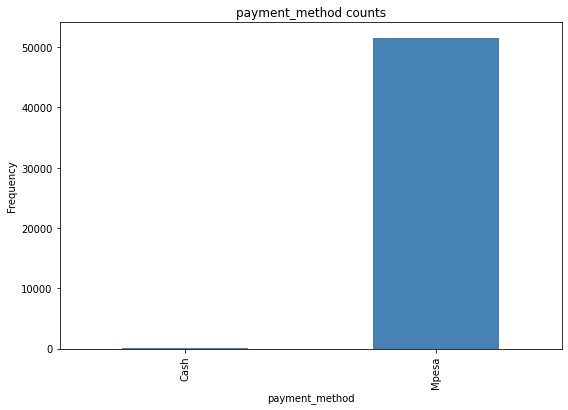

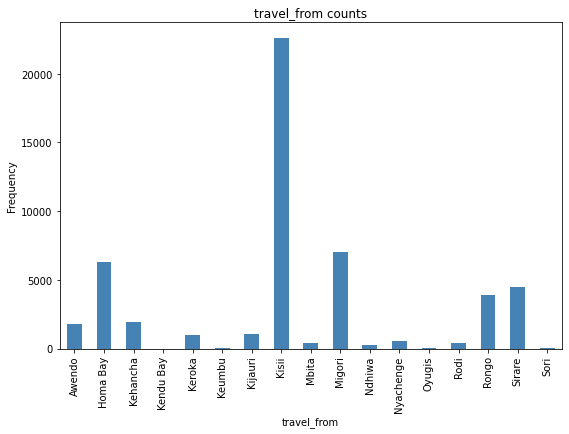

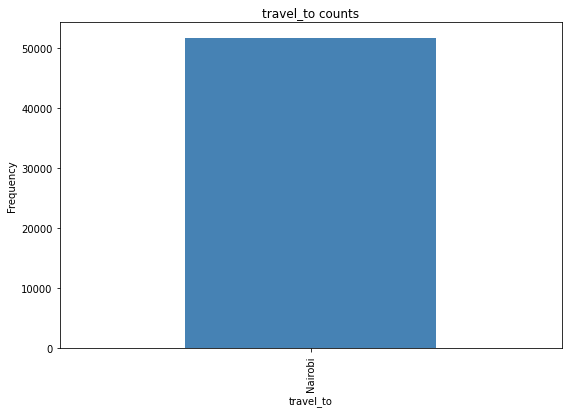

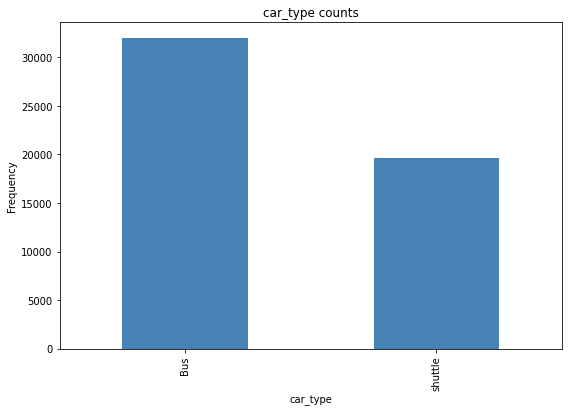

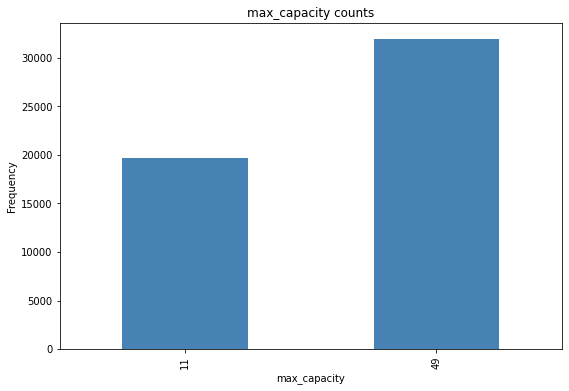

In [ ]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

**Inference**<br>
Most of the payments were done by using Mpesa payment method.
most number of ride are from kissi toward the Nairobi and there is a only one destination point is Nairobi.
Between two car_types Bus and shuttle people preferred bus most.
Bus has maximum capacity of 49 seats while shuttle has 11 seats.

Target variable<br>
Since we have to predict number of tickets books in each ride so adding target variable 'Tickets' as dependant variable to dataframe.

In [ ]:
#Creating target variable "Tickets"
target=df.groupby(['ride_id']).seat_number.count().rename('Tickets').reset_index()
target=target.drop_duplicates('ride_id')

In [ ]:
#Merging target variable with the dataframe
df=df.merge(target,how='left',on='ride_id')

In [ ]:
#checking the dataframe
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


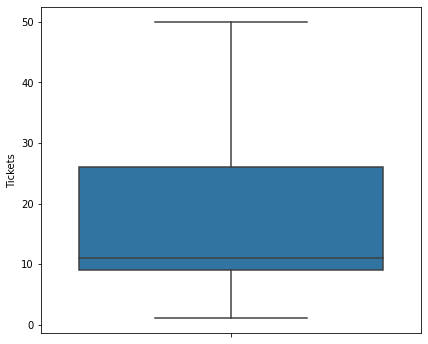

In [ ]:
#Plotting box plot for Target variable
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=df['Tickets'])
fig.set_title('')
fig.set_ylabel('Tickets')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


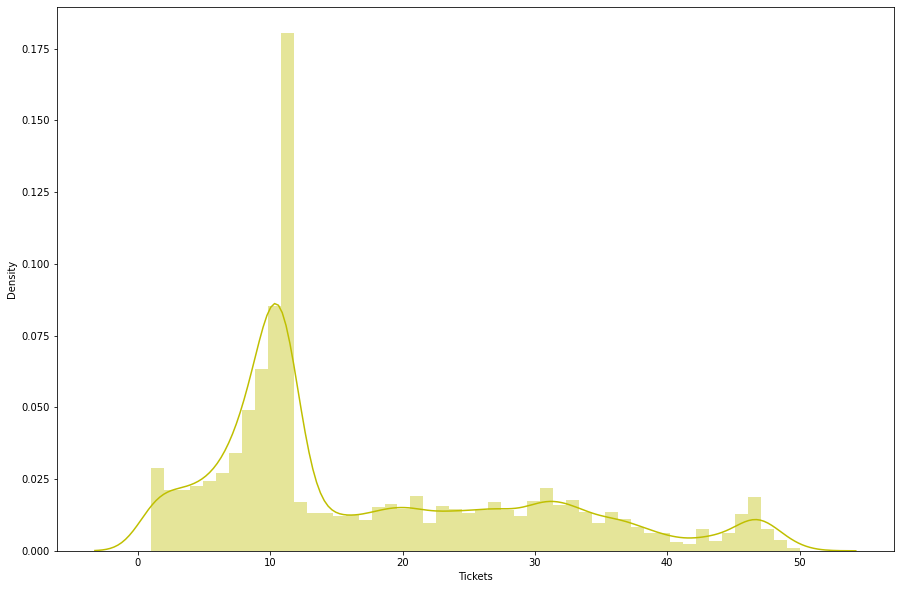

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(df['Tickets'],color="y")

##Exploratory Data Analysis

As ride_id column column doesn't give any idea about dependant variable so dropping that feature.

In [ ]:
#Dropping the ride id column
df.drop(["ride_id"], axis=1, inplace=True)

In [ ]:
#casting travel_date to datetime
df["travel_date"] = pd.to_datetime(df["travel_date"],infer_datetime_format=True)

#creating a new column travel day & month
df["travel_day"] = df["travel_date"].dt.dayofyear
df["month"]=df["travel_date"].dt.month

In [ ]:
#checking the info of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   seat_number      51645 non-null  object        
 1   payment_method   51645 non-null  object        
 2   payment_receipt  51645 non-null  object        
 3   travel_date      51645 non-null  datetime64[ns]
 4   travel_time      51645 non-null  object        
 5   travel_from      51645 non-null  object        
 6   travel_to        51645 non-null  object        
 7   car_type         51645 non-null  object        
 8   max_capacity     51645 non-null  int64         
 9   Tickets          51645 non-null  int64         
 10  travel_day       51645 non-null  int64         
 11  month            51645 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 5.1+ MB


In [ ]:
#encoding the car type category data
df["car_type"] = pd.Categorical(df["car_type"])
car_type_categories = df.car_type.cat.categories
df["car_type"] = df.car_type.cat.codes

In [ ]:
#encoding the travel from category data
df["travel_from"] = pd.Categorical(df["travel_from"])
travel_from_categories = df.travel_from.cat.categories
df["travel_from"] = df.travel_from.cat.codes

In [ ]:
#express travel time in hours
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) + (int(x[1])/60))

In [ ]:
df.head()

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets,travel_day,month
0,15A,Mpesa,UZUEHCBUSO,2017-10-17,7.250000,9,Nairobi,0,49,1,290,10
1,14A,Mpesa,TIHLBUSGTE,2017-11-19,7.200000,9,Nairobi,0,49,1,323,11
2,8B,Mpesa,EQX8Q5G19O,2017-11-26,7.083333,4,Nairobi,0,49,1,330,11
3,19A,Mpesa,SGP18CL0ME,2017-11-27,7.166667,1,Nairobi,0,49,5,331,11
4,11A,Mpesa,BM97HFRGL9,2017-11-27,7.200000,9,Nairobi,0,49,31,331,11


In [ ]:
#num_of_tickets per hour
ticks = df.groupby("travel_time")["Tickets"].count()
df["travel_time"].map(ticks)

0        2146
1        3540
2        1675
3         491
4        3540
         ... 
51640    1373
51641    1373
51642    1373
51643    2989
51644     277
Name: travel_time, Length: 51645, dtype: int64

In [ ]:
df["Tickets"] = (df["travel_time"].map(ticks))

In [ ]:
#Setting travel date column as index
df = df.set_index('travel_date')

In [ ]:
df.groupby(['travel_from', 'travel_time', 'travel_day'], sort=False)

In [ ]:
df['period'] = np.nan
df.loc[df.travel_time < 7, 'period'] = 'em'
df.loc[(df.travel_time >= 7) & (df.travel_time < 11), 'period'] = 'am'
df.loc[(df.travel_time >= 11) & (df.travel_time < 15), 'period'] = 'mid'
df.loc[(df.travel_time >= 15) & (df.travel_time < 19), 'period'] = 'eve'
df.loc[(df.travel_time >= 19) & (df.travel_time <= 24), 'period'] = 'pm'

In [ ]:
df["period"] = pd.Categorical(df["period"])
period_categories = df.period.cat.categories
df["period"] = df.period.cat.codes

In [ ]:
tcount = dict(df["period"].value_counts())

In [ ]:
df["hourly_travelers"] = (df["period"].map(tcount))
df.head()

,seat_number,payment_method,payment_receipt,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets,travel_day,month,period,hourly_travelers
travel_date,,,,,,,,,,,,,
2017-10-17,15A,Mpesa,UZUEHCBUSO,7.250000,9,Nairobi,0,49,2146,290,10,0,42211
2017-11-19,14A,Mpesa,TIHLBUSGTE,7.200000,9,Nairobi,0,49,3540,323,11,0,42211
2017-11-26,8B,Mpesa,EQX8Q5G19O,7.083333,4,Nairobi,0,49,1675,330,11,0,42211
2017-11-27,19A,Mpesa,SGP18CL0ME,7.166667,1,Nairobi,0,49,491,331,11,0,42211
2017-11-27,11A,Mpesa,BM97HFRGL9,7.200000,9,Nairobi,0,49,3540,331,11,0,42211


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51645 entries, 2017-10-17 to 2017-11-14
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seat_number       51645 non-null  object 
 1   payment_method    51645 non-null  object 
 2   payment_receipt   51645 non-null  object 
 3   travel_time       51645 non-null  float64
 4   travel_from       51645 non-null  int8   
 5   travel_to         51645 non-null  object 
 6   car_type          51645 non-null  int8   
 7   max_capacity      51645 non-null  int64  
 8   Tickets           51645 non-null  int64  
 9   travel_day        51645 non-null  int64  
 10  month             51645 non-null  int64  
 11  period            51645 non-null  int8   
 12  hourly_travelers  51645 non-null  int64  
dtypes: float64(1), int64(5), int8(3), object(4)
memory usage: 4.5+ MB


In [ ]:
tcount = dict(df["travel_day"].value_counts())
df["daily_travelers"] = (df["travel_day"].map(tcount))

In [ ]:
#removing the unnecessary columns
notrequired = ["seat_number","payment_method","payment_receipt","travel_to"]
for i in notrequired:
  df.drop(i , inplace = True , axis = 1)

In [ ]:
df.head()

,travel_time,travel_from,car_type,max_capacity,Tickets,travel_day,month,period,hourly_travelers,daily_travelers
travel_date,,,,,,,,,,
2017-10-17,7.250000,9,0,49,2146,290,10,0,42211,1
2017-11-19,7.200000,9,0,49,3540,323,11,0,42211,1
2017-11-26,7.083333,4,0,49,1675,330,11,0,42211,1
2017-11-27,7.166667,1,0,49,491,331,11,0,42211,305
2017-11-27,7.200000,9,0,49,3540,331,11,0,42211,305


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51645 entries, 2017-10-17 to 2017-11-14
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   travel_time       51645 non-null  float64
 1   travel_from       51645 non-null  int8   
 2   car_type          51645 non-null  int8   
 3   max_capacity      51645 non-null  int64  
 4   Tickets           51645 non-null  int64  
 5   travel_day        51645 non-null  int64  
 6   month             51645 non-null  int64  
 7   period            51645 non-null  int8   
 8   hourly_travelers  51645 non-null  int64  
 9   daily_travelers   51645 non-null  int64  
dtypes: float64(1), int64(6), int8(3)
memory usage: 3.3 MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


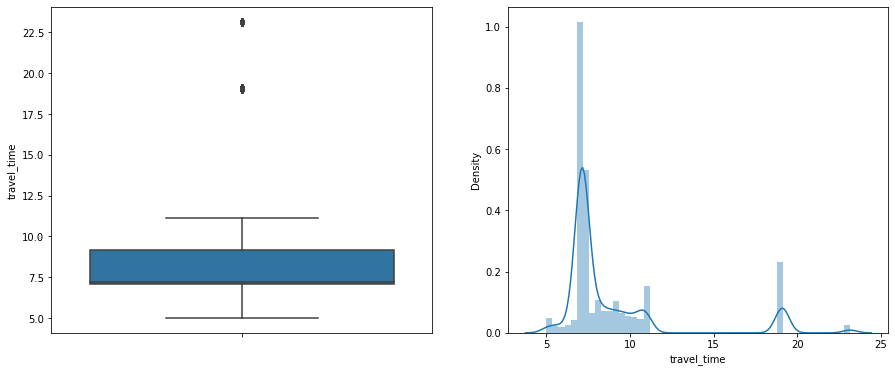

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


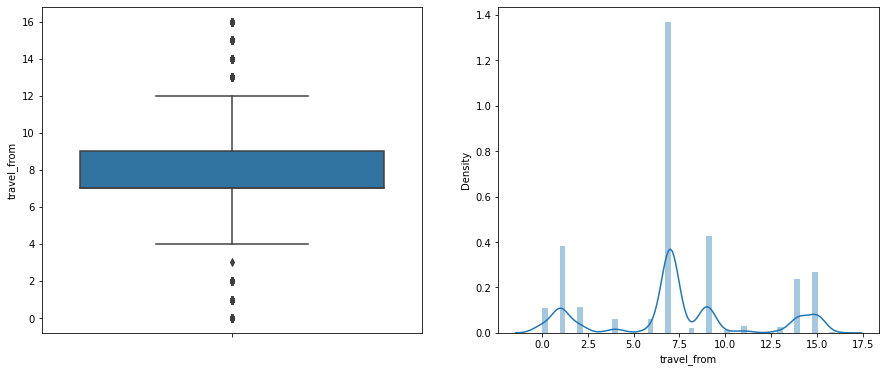

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


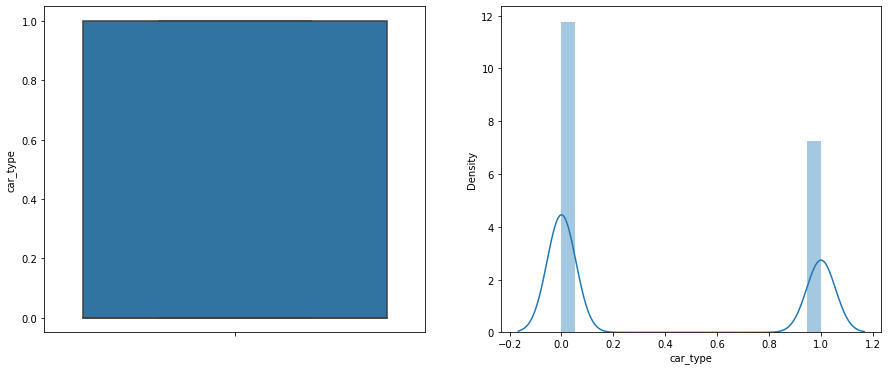

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


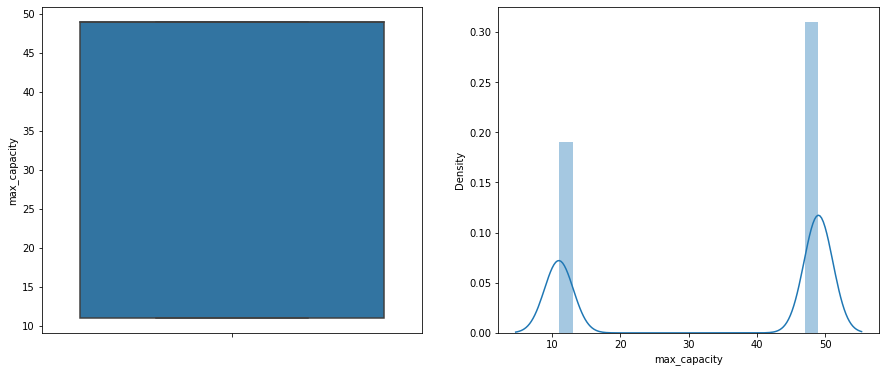

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


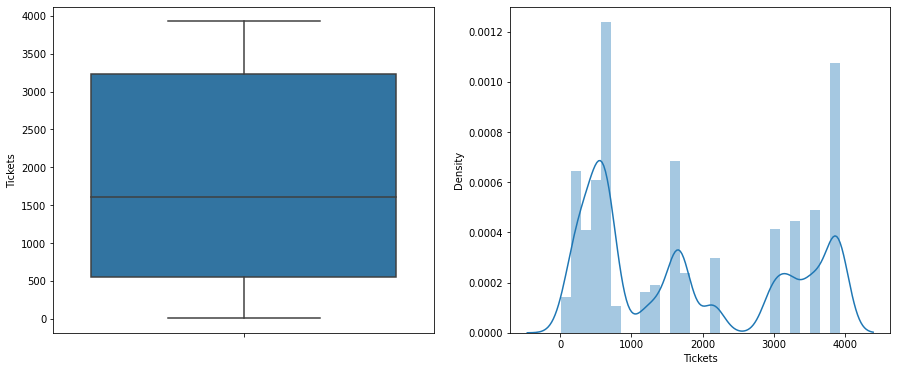

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


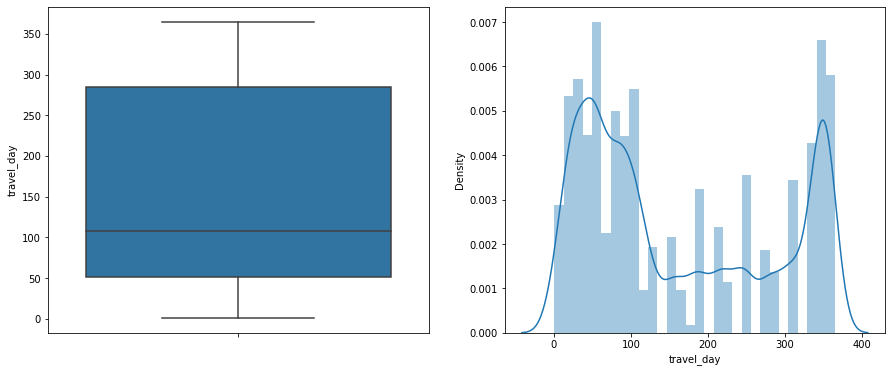

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


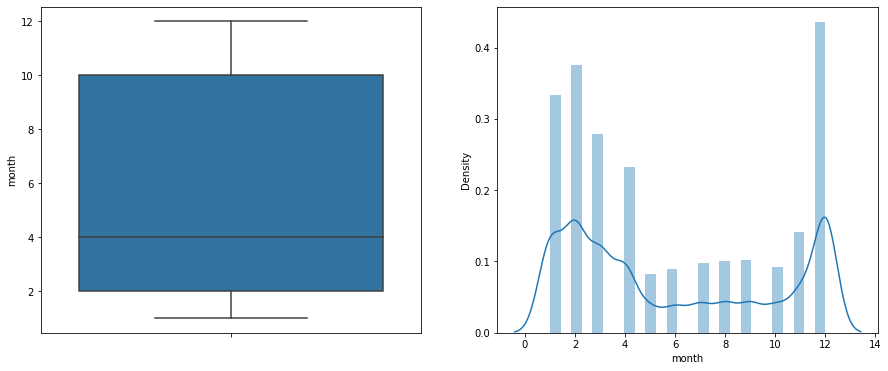

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


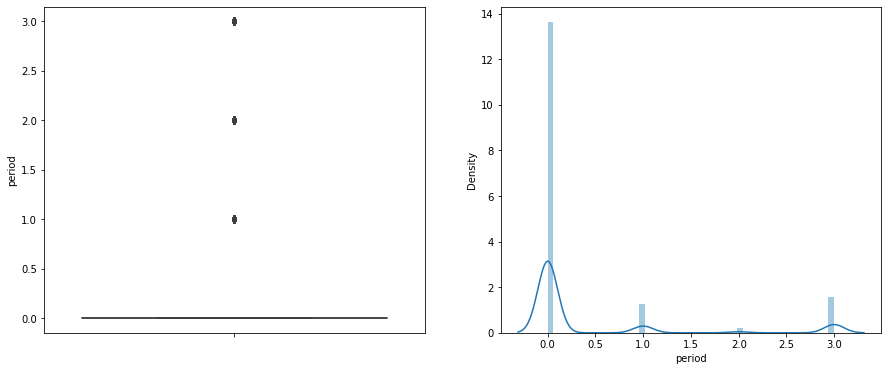

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


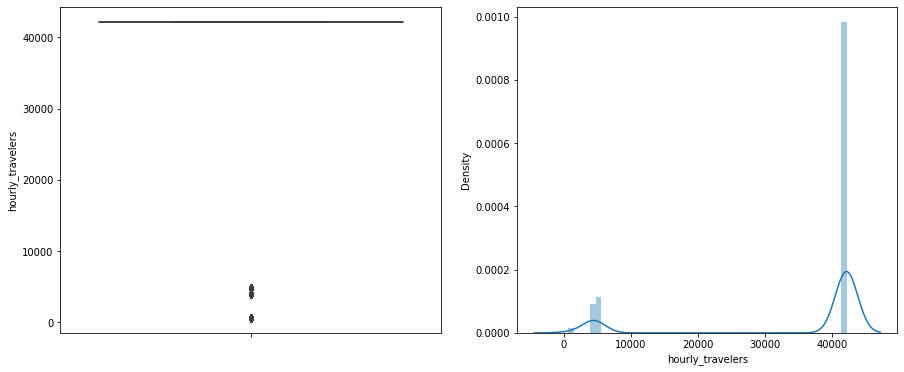

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


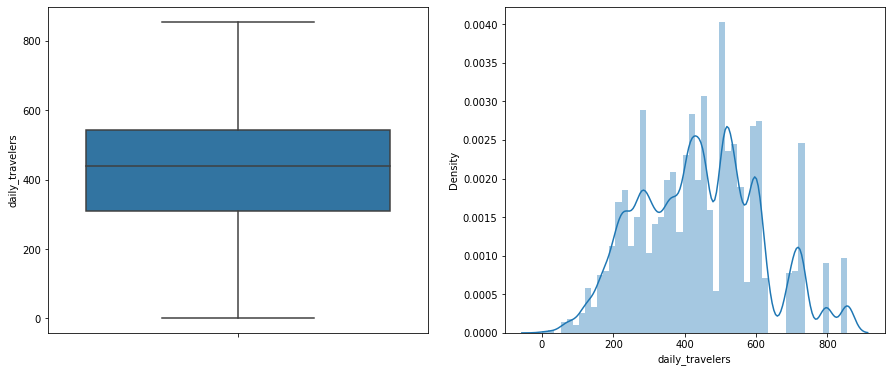

In [ ]:
for var in df.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

In [ ]:
#creating dependent and independent dataframe
df_independent, df_dependent = df.drop(["Tickets"], axis = 1),df["Tickets"]

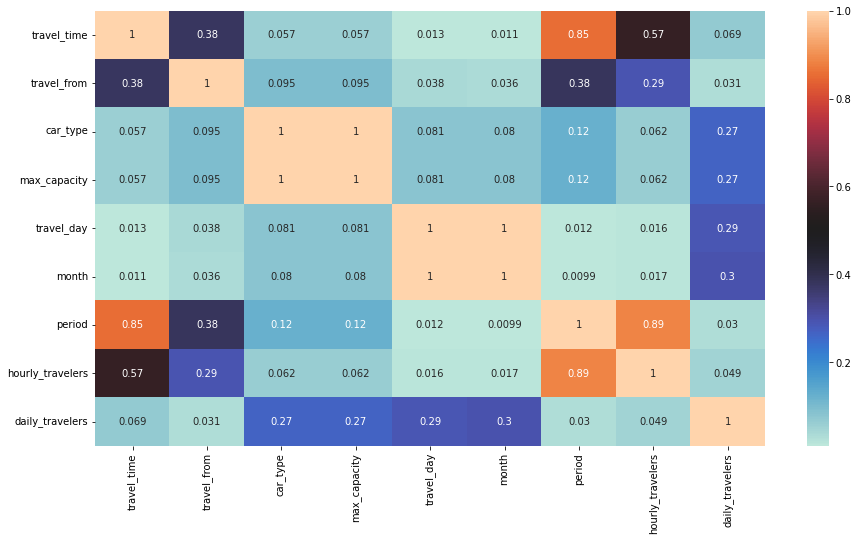

In [ ]:
#finding the correlation for multilinearity in independent variable
plt.figure(figsize=(15,8))
correlation = df_independent.corr()
sns.heatmap(abs(correlation), annot=True, cmap='icefire')

In [ ]:
#Dropping the collinear columns
Collinearcolumns = ["month","max_capacity", "period"]
for a in Collinearcolumns:
  df_independent.drop(a,inplace = True , axis = 1)

In [ ]:
df_independent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51645 entries, 2017-10-17 to 2017-11-14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   travel_time       51645 non-null  float64
 1   travel_from       51645 non-null  int8   
 2   car_type          51645 non-null  int8   
 3   travel_day        51645 non-null  int64  
 4   hourly_travelers  51645 non-null  int64  
 5   daily_travelers   51645 non-null  int64  
dtypes: float64(1), int64(3), int8(2)
memory usage: 2.1 MB


##**Importing Necessary Libraries**

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


##**Splitting the Dataframe into train and test sets.**
***

Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

In [ ]:
#Splitting dataset into Train & Test

X = df_independent.values
y = df_dependent.values
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(41316, 6)
(10329, 6)


##**Models**
***
Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 7 machine learning algorithms to predict the target variable and then we'll apply optimization techniques on the one that gives best resulting accuracy out of all.

Following algorithms have been used for predictions:-

* Linear Regression 
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* XGB Regression

### **Linear Regression**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression**:

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

**y=mx+b**

**Multivariable regression**:

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

**f(x,y,z)=w1x+w2y+w3z**

In [ ]:
# building the model and fitting training data
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# checking the score
reg.score(X_train, y_train)

0.49025432278481296

In [ ]:
# check the coefficeints
reg.coef_

array([ 1.01250916e+01, -4.70538287e+01, -1.86291573e+03, -4.41937657e-01,
        9.31670413e-03, -4.59614100e-01])

In [ ]:
# predict for train data
y_pred_train=reg.predict(X_train)

# predict for test data
y_pred_test=reg.predict(X_test)

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 958545.1216280534
RMSE : 979.053176098241
MAE : 751.8660554142026
R2 : 0.49025432278481296
Adjusted R2 : 0.4899580164427


In [ ]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 934957.4199821173
RMSE : 966.931962436922
MAE : 742.311195262545
R2 : 0.5028643011552731
Adjusted R2 : 0.5025753247753983


In [ ]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

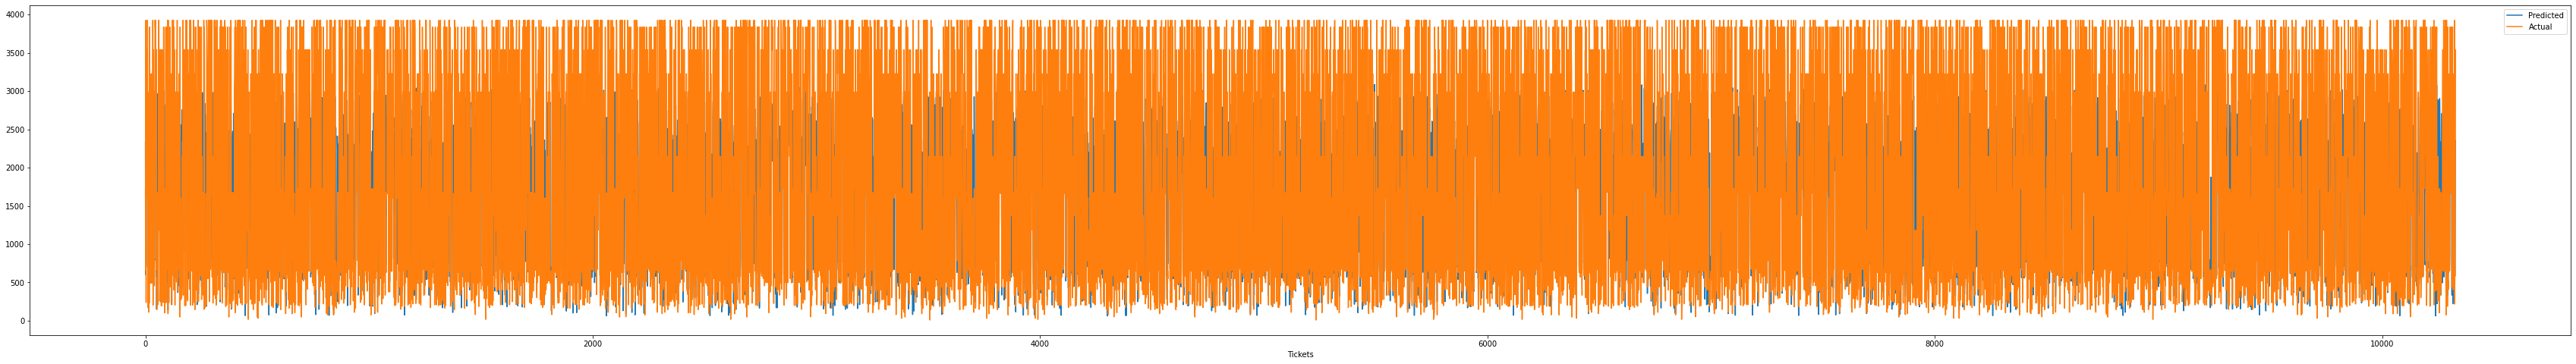

In [ ]:
# Plot the figure
plt.figure(figsize=(60,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Tickets')
plt.show()

### **Lasso Regression**

Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

**Limitation of Lasso Regression**:
Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Creating an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.5028523415081787 0.4902517412506514


In [ ]:
# Predict for training data
y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )


MSE : 958549.9760428872
RMSE : 979.0556552325752
MAE : 752.4429992998279
R2 : 0.4902517412506514
Adjusted R2 : 0.48995543340793724


In [ ]:
# storing the train set metrics value in the train evaluation dataframe
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )

MSE : 934979.9123535509
RMSE : 966.9435931601961
MAE : 742.8781527929722
R2 : 0.5028523415081787
Adjusted R2 : 0.502563358176368


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

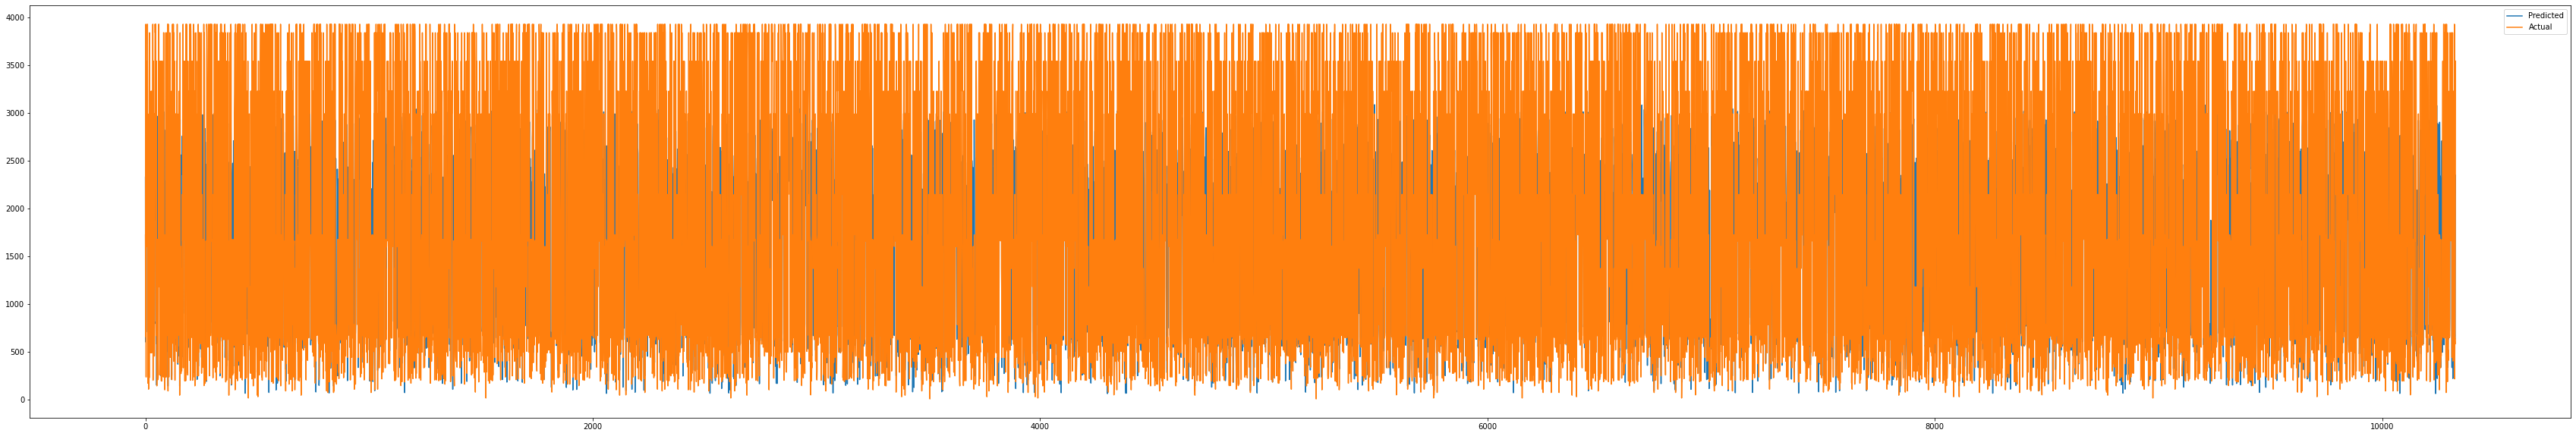

In [ ]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(60,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Ridge Regression**

In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient  lambda  to control that penalty term. In this case if  lambda  is zero then the equation is the basic OLS else if  lambda  >  0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

**Limitation of Ridge Regression**: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Creating the model object
ridge= Ridge(alpha=0.1)

In [ ]:
# Fitting the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# checking the score
ridge.score(X_train, y_train)

0.49025432273402836

In [ ]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 958545.1217235508
RMSE : 979.0531761470113
MAE : 751.8684988604683
R2 : 0.49025432273402836
Adjusted R2 : 0.48995801639188585


In [ ]:
# storing the train set metrics value in the train evaluation dataframe 
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 934957.5162944637
RMSE : 966.9320122399836
MAE : 742.3136149637546
R2 : 0.5028642499440579
Adjusted R2 : 0.5025752735344149


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

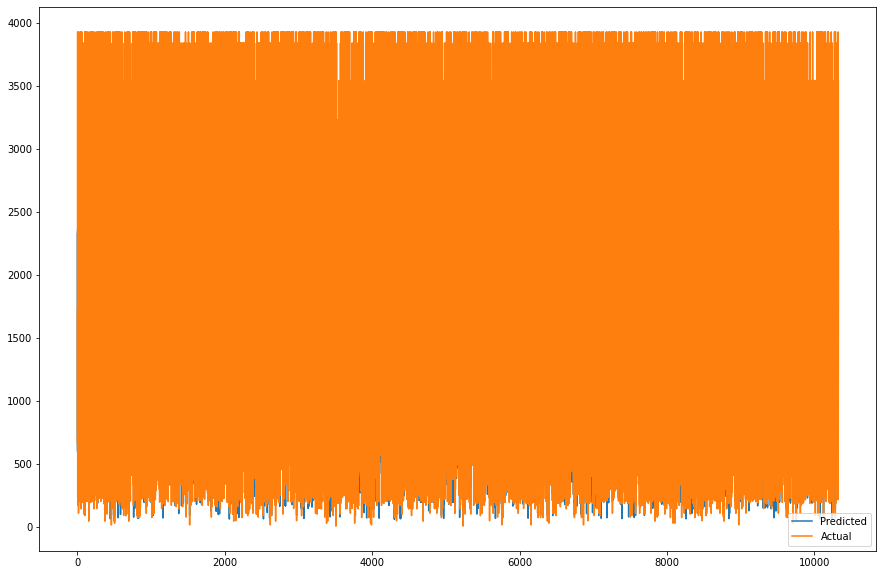

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Elastic Net Regression**

Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# creating a model object.
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.4760265654823457

In [ ]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 985299.5365521662
RMSE : 992.6225549281893
MAE : 808.6456507193018
R2 : 0.4760265654823457
Adjusted R2 : 0.4757219887910934


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 963547.0805920655
RMSE : 981.6043401452876
MAE : 799.360030182773
R2 : 0.4876626025502906
Adjusted R2 : 0.48736478968604935


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

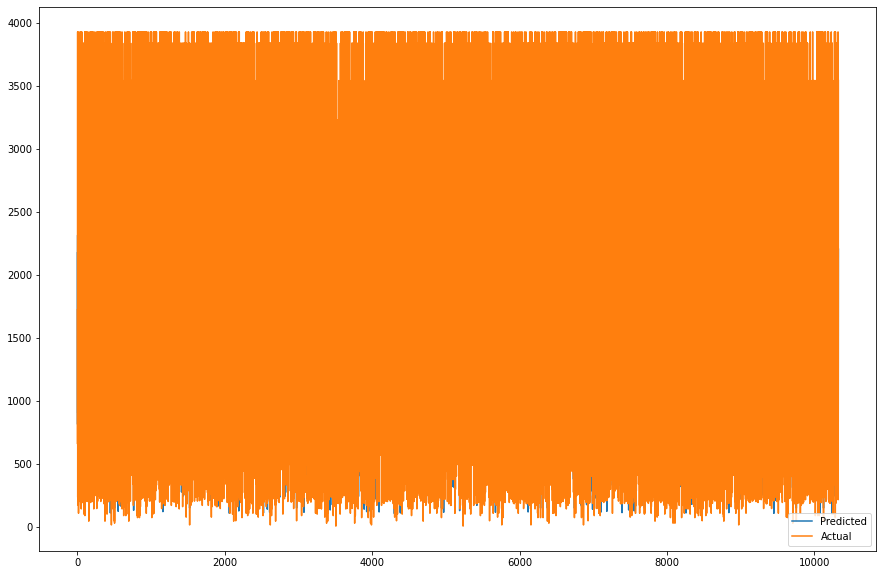

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# display test evaluation dataframe
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,742.311,934957.420,966.932,0.503,0.50
1,Lasso regression,742.878,934979.912,966.944,0.503,0.50
2,Ridge regression,742.314,934957.516,966.932,0.503,0.50
3,Elastic net regression Test,799.360,963547.081,981.604,0.488,0.49


###**Decision Tree**

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

**Root Node**: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf**: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# building the model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=5, max_leaf_nodes=100)
# fitting training data to the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=5,
                      max_leaf_nodes=100)

In [ ]:
# predict for train data
y_pred_train_d = decision_regressor.predict(X_train)

# predict for test data
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
# calculating model score
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# calculating r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


Model Score: 0.9808926930648083
MSE : 35930.10528355339
RMSE : 189.5523813713597
MAE : 52.81893080114702
R2 : 0.9808926930648083
Adjusted R2 : 0.9808815863178977


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:

# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


# calculating r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


MSE : 34298.41060566035
RMSE : 185.19830076342586
MAE : 49.56821713360454
R2 : 0.9817628439955752
Adjusted R2 : 0.9817522430523447


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# display train evaluation dataframe.
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,751.866,958545.122,979.053,0.490,0.49
1,Lasso regression,752.443,958549.976,979.056,0.490,0.49
2,Ridge regression,751.868,958545.122,979.053,0.490,0.49
3,Elastic net regression,808.646,985299.537,992.623,0.476,0.48
4,Decision tree regression,52.819,35930.105,189.552,0.981,0.98


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,742.311,934957.420,966.932,0.503,0.50
1,Lasso regression,742.878,934979.912,966.944,0.503,0.50
2,Ridge regression,742.314,934957.516,966.932,0.503,0.50
3,Elastic net regression Test,799.360,963547.081,981.604,0.488,0.49
4,Decision tree regression,49.568,34298.411,185.198,0.982,0.98


### **Random Forest**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# Create an instance of the RandomForestRegressor.
rf_model = RandomForestRegressor(n_estimators = 10, max_depth = 10)

# fitting the train data in model.
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [ ]:
# predict for train data.
y_pred_train_r = rf_model.predict(X_train)

# predict for test data.
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
# calculating model score.
print("Model Score:",rf_model.score(X_train,y_train))

# calculating MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


# calculating r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


Model Score: 0.9969319648432284
MSE : 5769.249772892676
RMSE : 75.95557762858944
MAE : 6.307970316186287
R2 : 0.9969319648432284
Adjusted R2 : 0.9969301814474776


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

# Calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


MSE : 6071.804698836887
RMSE : 77.921785778028
MAE : 6.533730260524057
R2 : 0.9967714990996459
Adjusted R2 : 0.9967696224279348


In [ ]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for random forest model
rf_model.feature_importances_

array([2.91478916e-01, 2.36350333e-01, 4.53319794e-01, 3.26807319e-04,
       1.84860944e-02, 3.80547773e-05])

In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,742.311,934957.420,966.932,0.503,0.50
1,Lasso regression,742.878,934979.912,966.944,0.503,0.50
2,Ridge regression,742.314,934957.516,966.932,0.503,0.50
3,Elastic net regression Test,799.360,963547.081,981.604,0.488,0.49
4,Decision tree regression,49.568,34298.411,185.198,0.982,0.98
5,Random forest regression,6.534,6071.805,77.922,0.997,1.00


###**XGB Regressor**

XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [ ]:
# making a model object of XGB regressor.
model = XGBRegressor(n_estimators=11, max_depth=8)

# fitting train data in XGB model. 
model.fit(X_train, y_train)

[17:58:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, n_estimators=11)

In [ ]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [ ]:
# calculating model score on train data.
print("Model Score:", model.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :", MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :", RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :", MAE_d)

# calculating r2
r2_d= r2_score(y_train, y_pred_train_xgb)
print("R2 :", r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )


Model Score: 0.7257385950254645
MSE : 515731.5570097874
RMSE : 718.1445237623047
MAE : 561.3353780690738
R2 : 0.7257385950254645
Adjusted R2 : 0.7255791716162563


In [ ]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_d)

# calculating r2
r2_d= r2_score((y_test), (y_pred_test_xgb))
print("R2 :",r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )

MSE : 513767.6176344515
RMSE : 716.7758489475294
MAE : 560.918846341437
R2 : 0.7268194056993753
Adjusted R2 : 0.7266606105467108


In [ ]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,742.311,934957.420,966.932,0.503,0.50
1,Lasso regression,742.878,934979.912,966.944,0.503,0.50
2,Ridge regression,742.314,934957.516,966.932,0.503,0.50
3,Elastic net regression Test,799.360,963547.081,981.604,0.488,0.49
4,Decision tree regression,49.568,34298.411,185.198,0.982,0.98
5,Random forest regression,6.534,6071.805,77.922,0.997,1.00
6,XGBoost regression,560.919,513767.618,716.776,0.727,0.73


##**Optimization**
***

From the Scores we have seen earlier Random forest has given by far the accuracy in predicting the target variable. Hence we have selected that for the optimization section. 

Here we'll try to improve the accuracy of the random forest model in predicting the number of Tickets books each ride. 

Now lets talk about Optimization technique we are using. But before diving into that we need to understand what hyperparameters are.

**Hyperparameters** are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, **max_depth** in Random Forest Algorithms.

Now we know what hyperparameters are, our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. To achieve that we'll use Grid Search CV that will help us find best hyperparameters values for our Random forest model.

**Grid Search** uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.


### **Random Forest with Grid Search CV**

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

In [ ]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {
'n_estimators': [200, 500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [5,6,7,8,9,10,11],

}
param_grid_cv

{'n_estimators': [200, 500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 6, 7, 8, 9, 10, 11]}

In [ ]:
# Running the GridSearchCV algorithm on above parameter dictionary 
# with estimator as rf_model(random forest model) to get the 
# best combination of parameters for random forest algorithm.
CV_rfc = GridSearchCV(estimator = rf_model, param_grid = param_grid_cv, cv = 3)

# Fitting the training data into the model.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=10),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [ ]:
# calculating model score on train data
print("Model Score:",CV_rfc.score(X_train,y_train))

# calculating MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


Model Score: 0.9985026835562325
MSE : 2815.6106797172724
RMSE : 53.06232825383063
MAE : 3.3912291160629544
R2 : 0.9985026835562325
Adjusted R2 : 0.9985018131920916


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression with gridSearchCV ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 3089.7614333385627
RMSE : 55.58562254161199
MAE : 3.487491266375677
R2 : 0.9983571115896854
Adjusted R2 : 0.9983561566070792


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression with gridSearchCV',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for grid CV random forest model.
rf_model.feature_importances_

array([2.91478916e-01, 2.36350333e-01, 4.53319794e-01, 3.26807319e-04,
       1.84860944e-02, 3.80547773e-05])

## **Conclusion**
***
Now that we are finished implementing all the models, its time to evaluate them and conclude our findings and learnings over them.

Lets start by looking at the training scores for all the models. 


In [ ]:
# Training Scores.
training_df 

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,751.866,958545.122,979.053,0.490,0.49
1,Lasso regression,752.443,958549.976,979.056,0.490,0.49
2,Ridge regression,751.868,958545.122,979.053,0.490,0.49
3,Elastic net regression,808.646,985299.537,992.623,0.476,0.48
4,Decision tree regression,52.819,35930.105,189.552,0.981,0.98
5,Random forest regression,6.308,5769.250,75.956,0.997,1.00
6,XGBoost Regression,561.335,515731.557,718.145,0.726,0.73
7,Random forest regression with gridSearchCV,3.391,2815.611,53.062,0.999,1.00


Also below are the testing scores for all the models.

In [ ]:
# Testing Scores.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,742.311,934957.420,966.932,0.503,0.50
1,Lasso regression,742.878,934979.912,966.944,0.503,0.50
2,Ridge regression,742.314,934957.516,966.932,0.503,0.50
3,Elastic net regression Test,799.360,963547.081,981.604,0.488,0.49
4,Decision tree regression,49.568,34298.411,185.198,0.982,0.98
5,Random forest regression,6.534,6071.805,77.922,0.997,1.00
6,XGBoost regression,560.919,513767.618,716.776,0.727,0.73
7,Random forest regression with gridSearchCV,3.487,3089.761,55.586,0.998,1.00


# **Epilogue**

Challenges faced:

*   Feature engineering – to get the more required features that will ease the further analysis

* What should be the dependent variables  
 
*   To filter the given data
*   Feature to be selected to get the required output

**Work Done by Team**


Nairobi Public Transport Demand Prediction was done by the group of four members-Abhishek kirar, Ganesh Subramanian, Mayur Chulbhare and Syed Aquib.

As soon as we downloaded the Nairobi public transport demand CSV file from Almabetter Dashboard then we uploaded the file in colab notebook through the drive. All the member in group were parcipated equally throughout the project. We used our experience from previous EDA project. As a team we read the data present in the file and gone through the data of each columns in detail as individual.The data was huge from which some of it was not needed for the analysis.

The data was cleaned and created the new dataframe and columns we required for the analysis. Each and every columns were compared to gain the knowledge about the data. Worked individually and gained insights doing some EDA. The first problem we faced was the name of the columns and nan values present in the data.We renamed the columns by using a dictionary format, we replaced all nan values to Zero in int dtype and unknown in object dtype by using .replace syntax. By getting info of dataframe we plotted graphs for each data to understand and visualized thoroughly. We splitted dataset into training and testing data  to predict model. We predictted modelling by using Linear Regression, Regularized linear regression(Ridge and Lasso), XGboost regresssor and also we tuned the parameters of  XGboost regressor and found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.

**The resulting model suppoe to be very useful for Mobiticket and Bus operators to anticipate customer demand for certain rides, to manage resources and vehicles more efficiently, to promote offers and sell other services more effectively, such as micro-insurance, or even improve customer service by being able to send alerts and other useful information to customers.**
